# Pendekatan Machine Learning

## Import Library yang diperlukan

menggunakan library yang diperlukan dan dataset pada pengimplementasian metode-metode yang digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score
data  = pd.read_csv("motorbike.csv", delimiter=',')
from sklearn import svm
data.head()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,18000,700,41.0,Ural Ranger,03/2021,Gasoline,Manual,Used,Euro4 2WD,/offers/ural-ranger-euro4-2wd-gasoline-black-c...
2,10000,80000,125.0,Harley-Davidson Night Rod,09/2010,Gasoline,Manual,Used,Night rod special,/offers/harley-davidson-night-rod-night-rod-sp...
3,12500,18000,82.0,Harley-Davidson Road King,02/1996,Gasoline,Manual,Used,FLHR Road King,/offers/harley-davidson-road-king-flhr-road-ki...
4,10950,10551,185.0,Suzuki,05/2015,Gasoline,Manual,Used,"Sport GSX R 1000, ABS, Complete titanium Yoshi...",/offers/suzuki-others-sport-gsx-r-1000-abs-com...


Cleaning dataset

In [2]:
data.isnull().sum() #lihat data hilang

price         0
mileage       0
power         0
make_model    0
date          0
fuel          0
gear          0
offer_type    0
version       0
link          0
dtype: int64

In [3]:
data = data.dropna() #menangani data hilang

In [4]:
data = data.dropna() #Menghapus Baris

In [5]:
data.duplicated().sum()  # Menampilkan jumlah baris duplikat
data = data.drop_duplicates()  # Menghapus duplikat

In [6]:
data = data.reset_index(drop=True)  # Mengatur ulang indeks dan menghapus indeks lama

In [7]:
data.to_csv('motorbike.csv', index=False)

In [8]:
data.isnull().sum() #lihat data 

price         0
mileage       0
power         0
make_model    0
date          0
fuel          0
gear          0
offer_type    0
version       0
link          0
dtype: int64

## Supervised Learning

### Support Vector Classifier (SVM)

digunakan pada label kategorikal

Mengambil 2 fitur untuk Binary Classification

In [9]:
X = data[['mileage', 'power']]
y = data['price']

Membagi data (split) ke train set dan test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Membuat objek classifier SVM

In [11]:
svm = SVC(kernel="rbf")

Melatih classifier dengan data train

In [12]:
svm.fit(X_train, y_train)

SVC()

Melakukan prediksi data test dengan model

In [13]:
y_pred = svm.predict(X_test)

Menyimpan nilai support vectors dan indeksnya

In [14]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

Plotting menggunakan scatter dari Seaborn dan menampilkan titik titik support vector, lalu membuat garis decision boundary, grafik decision boundary dan garis margin serta menambahkan label dan legenda

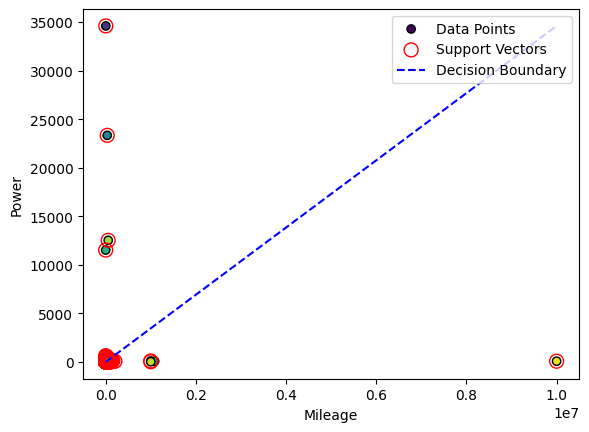

In [15]:
# Scatter plot
plt.scatter(data['mileage'], data['power'], c=range(len(data)), cmap='viridis', edgecolors='k', marker='o', label='Data Points')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='r', label='Support Vectors')

# Batasan keputusan (ganti X_line dan y_line dengan data)
X_line = np.linspace(min(data['mileage']), max(data['mileage']), 100)
y_line = np.linspace(min(data['power']), max(data['power']), 100)
plt.plot(X_line, y_line, linestyle='--', color='blue', label='Decision Boundary')

# Tetapkan label dan legenda untuk plot pencar
plt.xlabel('Mileage')
plt.ylabel('Power')
plt.legend(loc='upper right')

plt.show()


Melihat 4 nilai metriks dengan menggunakan library dari Scikit-Learn yaitu Classification Report.

In [16]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         250       0.00      0.00      0.00         2
         390       0.00      0.00      0.00         1
         399       0.00      0.00      0.00         1
         420       0.00      0.00      0.00         1
         450       0.00      0.00      0.00         1
         549       0.00      0.00      0.00         1
         600       0.00      0.00      0.00         1
         700       0.00      0.00      0.00         1
         749       0.00      0.00      0.00         1
         750       0.00      0.00      0.00         1
         795       0.00      0.00      0.00         1
         800       0.00      0.00      0.00         1
         890       0.00      0.00      0.00         1
         899       0.00      0.00      0.00         1
         900       0.00      0.00      0.00         1
         940       0.00      0.00      0.00         1
         950       0.00      0.00      0.00         5
         999       0.00    

D:\OneDrive\Documents\SEMESTER 5\PRAK KECERDASAN BUATAN\POSTTEST\POSTTEST1\Fauzi_128\Fauzi_128\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\OneDrive\Documents\SEMESTER 5\PRAK KECERDASAN BUATAN\POSTTEST\POSTTEST1\Fauzi_128\Fauzi_128\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\OneDrive\Documents\SEMESTER 5\PRAK KECERDASAN BUATAN\POSTTEST\POSTTEST1\Fauzi_128\Fauzi_128\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set 

### Linear Regression

In [17]:
X, y = data[['power']], data['mileage'] #Memisahkan fitur dan target dari dataset 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31) #Membagi data fitur dan target menjadi data training

In [19]:
#Membuat model regresi linear, melatih model dengan data training dan menggunakan model untuk membuat prediksi pada data test
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

Visualisasi hasil prediksi regresi linear pada data test yang membandingkan prediksi (garis biru) dengan data asli (titik hitam) untuk melihat sejauh mana model cocok dengan data aktual

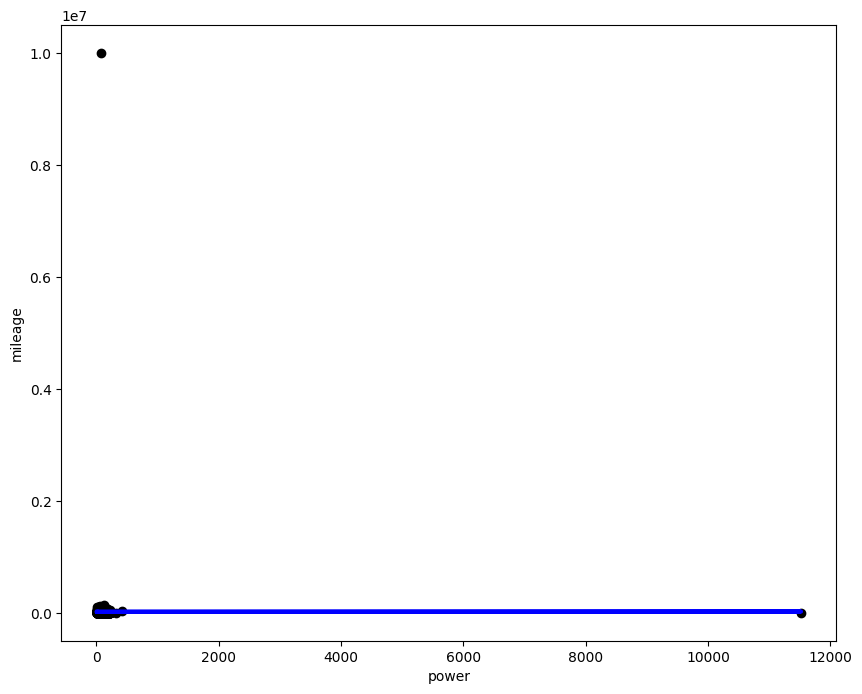

In [20]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='blue', linewidth=3)
plt.scatter(X_test, y_test, c='Black')
plt.xlabel("power")
plt.ylabel("mileage")
plt.show()

Membuat objek classifier SVM

In [24]:
from sklearn.svm import SVR

svm = SVR(kernel="linear")
svm.fit(X_train, y_train) # Melatih Model dengan Train Set
y_pred = svm.predict(X_test)

melakukan prediksi data test dengan model dan menampilkan hasil

In [25]:

print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 20397.466565843217
MSE : 82230985788.37198
RMSE : 286759.4563190061
R-Squared : -0.002259290873415587


## Unsupervised Learning

### K-Means

Menggunakan fitur X dan menentukan banyaknya kelompok

In [26]:
X = data[["power", "mileage"]]
K = 2

Inisialisasi K-Means dan melatih model K-Means berdasarkan data X

In [27]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

Membuat label kelompok dari model dan tambah kolom prediksi serta titik pusat kelompok dari model

In [28]:
cluster_labels = kmeans.labels_
data["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

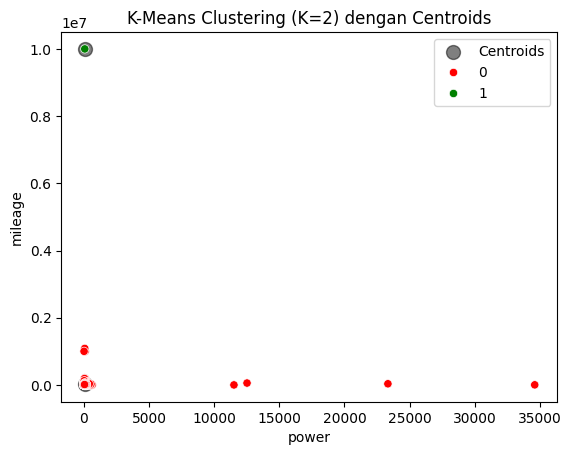

In [29]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=data, x="power", y="mileage", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("power")
plt.ylabel("mileage")
plt.legend()
plt.show()

Membuat crosstab untuk membandingkan cluster labels dengan true labels

In [30]:
cross_tab = pd.crosstab(data["cluster"], data["price"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
price    2          100        150        200        250        270        \
cluster                                                                     
0                1          1          1          1          2          1   
1                0          0          0          0          0          0   

price    295        350        390        399        ...  112000     \
cluster                                              ...              
0                1          1          1          1  ...          1   
1                0          0          0          0  ...          0   

price    114990     123457     149900     199999     239993     999999     \
cluster                                                                     
0                1          2          1          1          1          1   
1                0          0          0          0          0          0   

price    1000000    123456789  888888888  
cluster                             

Menghitung dan mencetak nilai "Adjusted Rand Index (ARI)" yang mengukur sejauh mana clustering dengan algoritma K-Means

In [31]:
ari = adjusted_rand_score(data["price"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.00


Menghitung dan mencetak nilai "Normalized Mutual Information (NMI)" untuk mengevaluasi sejauh mana hasil clustering dengan algoritma K-Means

In [32]:
true_labels_num = data["price"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.00


Homogeneity, Completeness dan V-Measure membantu mengukur sejauh mana hasil klustering sesuai dengan label asli data dan seberapa baik klustering tersebut dalam mengelompokkan data

In [33]:
homogeneity = homogeneity_score(data["price"], cluster_labels)
completeness = completeness_score(data["price"], cluster_labels)
v_measure = v_measure_score(data["price"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.00
Completeness Score: 0.69
V-Measure Score: 0.00
